<a href="https://colab.research.google.com/github/mlaporte13/FCC.Map.Stars/blob/master/FCC_Doc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### FCC: Mapping the Stars

This project utilizes Skyfield: a python program that can calculate the positions of stars, planets and satellites that are in orbit around Earth. The results from Skyfield are similar to the positions found by the United States Naval Observatory within a range of 0.0005 arcseconds. This program specifically, finds the locations of stars and generates an image of what the sky would look like/the positioning of these stars in relation to Earth.

In [107]:
!pip install skyfield
!pip install pandas 

from skyfield.api import load
from skyfield import api

After installing Skyfield and pandas, which will be used in conjunction with Skyfield, the next step is to load in the planets, so that Earth can be selected. Then the timescale is chosen. For this program the timescale is present time, so the image of the sky is how it would look today.

In [0]:
planets = load('de421.bsp')
earth = planets['earth']
ts = api.load.timescale()
t = ts.now()

Then the dataframe with information about approximately 118,200 stars is created. After that, the amount of stars is decreased to only include the brightest stars to make the data more manageable and a clearer image when plotted. Next, the positions of the stars is found using Skyfield and stored under the variable astrometric.


In [138]:
from skyfield.api import Star, load
from skyfield.data import hipparcos

with load.open(hipparcos.URL) as f:
    df = hipparcos.load_dataframe(f)
    
stars = df[df['magnitude'] <= 5]
print('The number of stars selected is',len(stars))

bright_stars = Star.from_dataframe(stars)
    
astrometric = earth.at(t).observe(bright_stars)
ra, dec, distance = astrometric.radec()

The number of stars selected is 1627


Lastly, the data is plotted using matplotlib. A scatterplot of the brightest stars is created using the locations of the stars. The locations are plotted as right ascension hours vs. declination degrees. Right acsension and declination are the longitude and latitudes of the sky. Right ascension is the east/west direction like longitude and declination is the north/south direction like latitude. Right ascension is measured in units of time because the Earth is rotating, so different parts of the sky are seen throughout the span of the night. Declination takes into account the curvature of the Earth and tells you how high overhead a celestial object will appear depending on your location.

/usr/local/lib/python3.6/dist-packages/matplotlib/collections.py:874: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


Text(0.5, 1.0, 'Brightest Stars As Seen From Earth')

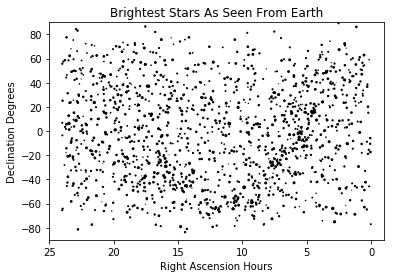

In [140]:
from matplotlib import pyplot as plt

plt.scatter(ra.hours, dec.degrees, 10-df['magnitude'], 'k')
plt.xlabel('Right Ascension Hours')
plt.ylabel('Declination Degrees')
plt.xlim(25.0,-1.0)
plt.ylim(-90,90)
plt.title('Brightest Stars As Seen From Earth')